In [33]:
import pandas as pd


In [34]:
data = pd.read_csv("synthetic_salary_data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,60,Male,Master's,Marketing Manager,1,61200
1,50,Female,Bachelor's,Data Analyst,39,82900
2,36,Male,Bachelor's,Software Engineer,17,60400
3,64,Female,Master's,Marketing Manager,3,63600
4,29,Male,Master's,Marketing Manager,7,68400


In [35]:
data.shape

(7000, 6)

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# One-hot encode Education Level and Job Title
data = pd.get_dummies(data, columns=['Education Level', 'Job Title'])


In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize Age and Years of Experience
scaler = StandardScaler()
data[['Age', 'Years of Experience']] = scaler.fit_transform(data[['Age', 'Years of Experience']])


In [39]:
data.shape

(7000, 17)

In [40]:
data.describe()

,Age,Gender,Years of Experience,Salary
count,7.000000e+03,7000.000000,7.000000e+03,7000.000000
mean,7.359193e-18,0.510571,2.334640e-17,83386.864286
std,1.000071e+00,0.499924,1.000071e+00,21171.799638
min,-1.718856e+00,0.000000,-1.701091e+00,41050.000000
25%,-8.204584e-01,0.000000,-8.089794e-01,67500.000000
50%,-3.733599e-03,1.000000,-6.079102e-03,83100.000000
75%,8.946636e-01,1.000000,8.860324e-01,99000.000000
max,1.711388e+00,1.000000,1.688933e+00,130700.000000


In [41]:
data.head()

,Age,Gender,Years of Experience,Salary,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Data Analyst,Job Title_Data Scientist,Job Title_HR Specialist,Job Title_Marketing Manager,Job Title_Product Manager,Job Title_Project Manager,Job Title_Sales Executive,Job Title_Software Engineer,Job Title_Systems Engineer,Job Title_UX Designer
0,1.384698,1,-1.701091,61200,False,True,False,False,False,False,True,False,False,False,False,False,False
1,0.567974,0,1.688933,82900,True,False,False,True,False,False,False,False,False,False,False,False,False
2,-0.575441,1,-0.273713,60400,True,False,False,False,False,False,False,False,False,False,True,False,False
3,1.711388,0,-1.522669,63600,False,True,False,False,False,False,True,False,False,False,False,False,False
4,-1.147148,1,-1.165824,68400,False,True,False,False,False,False,True,False,False,False,False,False,False


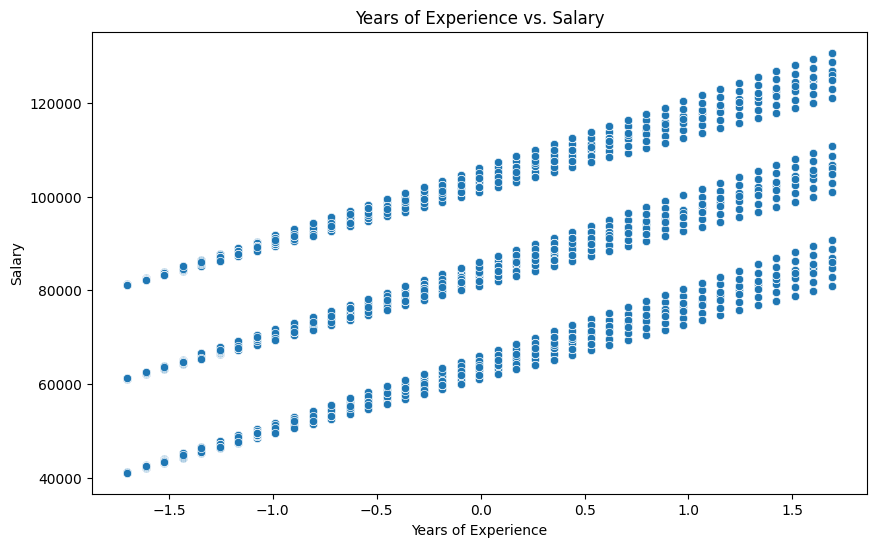

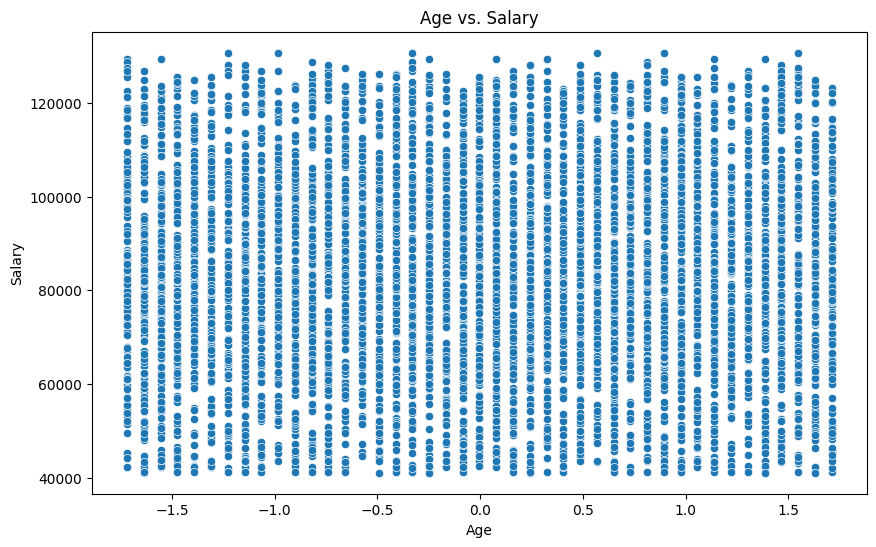

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Years of Experience vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=data)
plt.title('Years of Experience vs. Salary')
plt.show()

# Scatter plot for Age vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Age vs. Salary')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = data.drop('Salary', axis=1)  # Drop the Salary column to create the feature set
y = data['Salary']  # Salary is the target variable

# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 5600
Testing set size: 1400


In [44]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [45]:
# Predict on the test set
y_pred = linear_model.predict(X_test)
y_pred


array([ 86008.,  72368.,  83684., ...,  79844.,  81364., 110044.])

In [47]:
# Calculate all evaluation metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test and y_pred are defined
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 556.8771428571429
Mean Squared Error (MSE): 610046.0114285714
Root Mean Squared Error (RMSE): 781.0544228340119
R-squared (R²): 0.9985800398737346


In [48]:
# Check coefficients in linear regression
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": linear_model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)


                        Feature   Coefficient
2           Years of Experience  1.311611e+04
1                        Gender  1.888207e+01
0                           Age -7.180864e+00
7      Job Title_Data Scientist -2.554926e+14
10    Job Title_Product Manager -2.554926e+14
13  Job Title_Software Engineer -2.554926e+14
9   Job Title_Marketing Manager -2.554926e+14
14   Job Title_Systems Engineer -2.554926e+14
15        Job Title_UX Designer -2.554926e+14
11    Job Title_Project Manager -2.554926e+14
12    Job Title_Sales Executive -2.554926e+14
6        Job Title_Data Analyst -2.554926e+14
8       Job Title_HR Specialist -2.554926e+14
5           Education Level_PhD -2.198475e+16
4      Education Level_Master's -2.198475e+16
3    Education Level_Bachelor's -2.198475e+16


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Load data from synthetic_salary_data.csv
df = pd.read_csv('synthetic_salary_data.csv')

# Encode categorical variables (Education Level, Job Title) - Remove Gender
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[['Education Level', 'Job Title']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Drop original categorical columns (Gender, Education Level, Job Title) and concatenate the encoded features
df = pd.concat([df.drop(['Gender', 'Education Level', 'Job Title'], axis=1), encoded_df], axis=1)

# Split data into features (X) and target (y)
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features (Age, Years of Experience)
scaler = StandardScaler()
X_train[['Age', 'Years of Experience']] = scaler.fit_transform(X_train[['Age', 'Years of Experience']])
X_test[['Age', 'Years of Experience']] = scaler.transform(X_test[['Age', 'Years of Experience']])

# Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model (optional but useful for understanding performance)
train_score = model.score(X_train, y_train)  # R-squared on training data
test_score = model.score(X_test, y_test)  # R-squared on testing data
print(f'Training R-squared: {train_score:.4f}')
print(f'Test R-squared: {test_score:.4f}')

# Save the trained model, scaler, and encoder for later use
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("Model, scaler, and encoder saved successfully.")


Training R-squared: 0.9986
Test R-squared: 0.9986
Model, scaler, and encoder saved successfully.


Predicted Salary: $41786.87


Training R-squared: 0.9986
Test R-squared: 0.9986
Mean Absolute Error (MAE): 558.11
Mean Squared Error (MSE): 610972.29
Root Mean Squared Error (RMSE): 781.65
R-squared (R²): 0.9986
Cross-validation R² scores: [0.9985505  0.99860798 0.99863545 0.99865344 0.99862392]
Mean cross-validation R² score: 0.9986
Model, scaler, and encoder saved successfully.


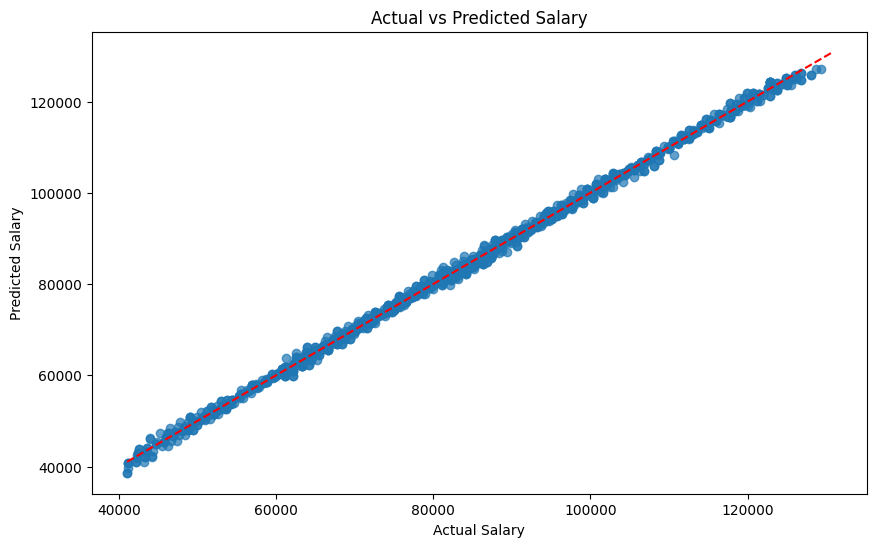

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load data from synthetic_salary_data.csv
df = pd.read_csv('synthetic_salary_data.csv')

# Encode categorical variables (Gender, Education Level, Job Title)
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[['Gender', 'Education Level', 'Job Title']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Drop original categorical columns and concatenate the encoded features
df = pd.concat([df.drop(['Gender', 'Education Level', 'Job Title'], axis=1), encoded_df], axis=1)

# Split data into features (X) and target (y)
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features (Age, Years of Experience)
scaler = StandardScaler()
X_train[['Age', 'Years of Experience']] = scaler.fit_transform(X_train[['Age', 'Years of Experience']])
X_test[['Age', 'Years of Experience']] = scaler.transform(X_test[['Age', 'Years of Experience']])

# Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model with R-squared on training and test data
train_score = model.score(X_train, y_train)  # R-squared on training data
test_score = model.score(X_test, y_test)  # R-squared on testing data
print(f'Training R-squared: {train_score:.4f}')
print(f'Test R-squared: {test_score:.4f}')

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate other performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Perform cross-validation and get the R² score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean cross-validation R² score: {cv_scores.mean():.4f}")

# Save the trained model, scaler, and encoder for later use
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("Model, scaler, and encoder saved successfully.")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Ideal line (Red)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()


In [ ]:
import joblib
import pandas as pd

# Load the saved model, scaler, and encoder
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoder.pkl')

# Get user input
age = int(input("Enter your age: "))
years_of_experience = int(input("Enter your years of experience: "))
education_level = input("Enter your education level (e.g., Bachelor's, Master's, PhD): ")
job_title = input("Enter your job title: ")

# Create a DataFrame with the user input
data = {
    'Age': [age],
    'Years of Experience': [years_of_experience],
    'Education Level': [education_level],
    'Job Title': [job_title]
}

input_df = pd.DataFrame(data)

# Encode categorical features (Education Level, Job Title)
encoded_features = encoder.transform(input_df[['Education Level', 'Job Title']])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Drop original categorical columns and concatenate the encoded features
input_df = pd.concat([input_df.drop(['Education Level', 'Job Title'], axis=1), encoded_df], axis=1)

# Scale numeric features (Age, Years of Experience)
input_df[['Age', 'Years of Experience']] = scaler.transform(input_df[['Age', 'Years of Experience']])

# Make a prediction
predicted_salary = model.predict(input_df)

print(f"Predicted Salary: ${predicted_salary[0]:.2f}")